## Import Libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

%matplotlib inline

## Load the Data

In [2]:
gk_df = pd.read_csv("goalkeeper.csv")

In [3]:
r_df = pd.read_csv('rest.csv')

In [4]:
gk_df.shape

(914, 18)

In [5]:
r_df.shape

(7514, 19)

## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [6]:
r_df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,7,Manchester United,Defender Centre-Back,185.0,31.0,8,0.0,0.0,0.216346,0.0,0.0,416,932,169,7,2000000,20000000,2,0
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,2758,47,13,0,2000000,2000000,2,0


In [7]:
r_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7514 entries, 0 to 7513
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7514 non-null   int64  
 1   team                 7514 non-null   object 
 2   position             7514 non-null   object 
 3   height               7514 non-null   float64
 4   age                  7514 non-null   float64
 5   appearance           7514 non-null   int64  
 6   goals                7514 non-null   float64
 7   assists              7514 non-null   float64
 8   yellow cards         7514 non-null   float64
 9   second yellow cards  7514 non-null   float64
 10  red cards            7514 non-null   float64
 11  minutes played       7514 non-null   int64  
 12  days_injured         7514 non-null   int64  
 13  games_injured        7514 non-null   int64  
 14  award                7514 non-null   int64  
 15  current_value        7514 non-null   i

In [8]:
r_df.drop(columns = ['Unnamed: 0', 'position'], inplace = True)

In [9]:
gk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           914 non-null    int64  
 1   team                 914 non-null    object 
 2   position             914 non-null    object 
 3   height               914 non-null    float64
 4   age                  914 non-null    float64
 5   appearance           914 non-null    int64  
 6   assists              914 non-null    float64
 7   yellow cards         914 non-null    float64
 8   second yellow cards  914 non-null    float64
 9   red cards            914 non-null    float64
 10  goals conceded       914 non-null    float64
 11  clean sheets         914 non-null    float64
 12  minutes played       914 non-null    int64  
 13  days_injured         914 non-null    int64  
 14  games_injured        914 non-null    int64  
 15  award                914 non-null    int

In [10]:
gk_df.drop(columns = ['Unnamed: 0', 'position'], inplace = True)

In [11]:
categorical_features = ['team']

In [12]:
# one hot coding
r_df = pd.get_dummies(r_df, columns=categorical_features)

In [13]:
gk_df = pd.get_dummies(gk_df, columns = categorical_features)

#### 3. Feature selection

In [14]:
# sns.heatmap(df.corr(), annot=True);

In [15]:
correlation = r_df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.419492
appearance                   0.374936
minutes played               0.360328
games_injured                0.173994
                               ...   
team_Swallows FC            -0.053696
team_Daejeon Hana Citizen   -0.054213
team_Al-Batin FC            -0.055105
team_Royal AM FC            -0.058911
team_Marumo Gallants FC     -0.059288
Name: current_value, Length: 387, dtype: float64


In [16]:
# Set the correlation threshold
threshold = 0.20  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'current_value', 'highest_value'], dtype='object')

In [17]:
selected_features_gk = ['age', 'appearance', 'minutes played', 'current_value',
       'highest_value']

In [18]:
selected_features_r = ['appearance', 'minutes played', 'current_value', 'highest_value']

In [19]:
gk_df = gk_df[selected_features_gk]
r_df = r_df[selected_features_r]

In [20]:
X1 = r_df.drop(['current_value'], axis=1)
y1 = r_df['current_value']

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

In [21]:
model1 = LinearRegression()

In [22]:
model1.fit(X_train_scaled1, y_train1)

LinearRegression()

#### 4. Prepare train and test data

In [23]:
# Prepare data
X = gk_df.drop(['current_value'], axis=1)
y = gk_df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X.shape

(914, 4)

## Buliding the Model

In [25]:
model = LinearRegression()

## Train the Model

In [26]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [27]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [28]:
model.coef_

array([ 8366.28648617, 72314.37254243, 11057.25076145, 53361.06015918])

In [29]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,8366.286486
appearance,72314.372542
minutes played,11057.250761
highest_value,53361.060159


In [30]:
print(model.intercept_) 

262906.9767441861


In [34]:
param_grid ={
    'alpha': [0.01, 0.1, 1, 5, 10, 20, 50]
}
lasso_model = GridSearchCV(Lasso(), param_grid)

In [35]:
ridge_model = GridSearchCV(Ridge(), param_grid)

In [36]:
lasso_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 50]})

In [37]:
ridge_model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 50]})

In [41]:
coeff_df = pd.DataFrame(lasso_model.best_estimator_.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,8330.826292
appearance,83266.155509
minutes played,70.616926
highest_value,53327.844354


In [42]:
y_test =lasso_model.predict(X_test_scaled)

## Evaluating the Model 

1. Mean Square Error

In [43]:
y_base = [y_train.mean()] * len(y_test)

In [44]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 18113345447.860283


In [45]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 39069862362.406204
Mean Squared Error for testing: 100850.46121005896


2. Mean Absolute Error

In [46]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 94571.77146281816


In [47]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 154561.74774675173
Mean Absolute Error for testing: 227.74977888538783


3. Root Mean Squared Error

In [48]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 307.5252371152946


In [49]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 197660.97835032135
Root Mean Squared Error for testing: 317.5696163206722


4. R Square

In [50]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.23608496758944708
R Square for testing: 0.9999944082891847


#### Predictions vs. Real Values

In [40]:
predictions = model.predict(X_test_scaled)
#predictions

In [41]:
Real_Values = np.array(y_test)
#Real_Values

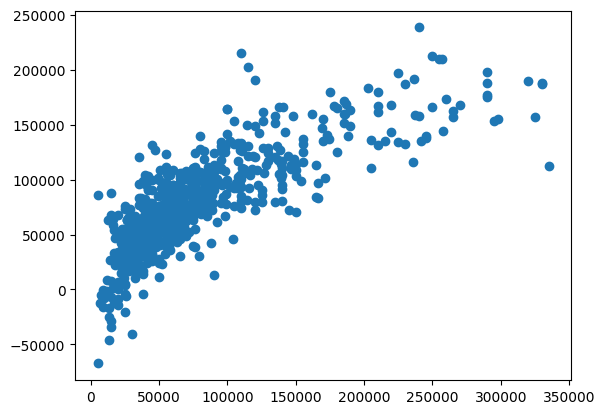

In [41]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

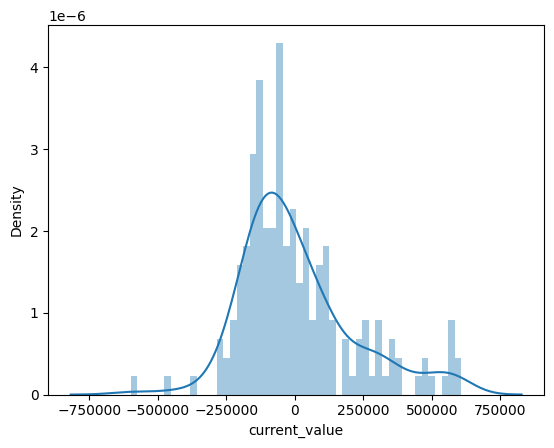

In [42]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

In [ ]:
print('')